voor het verwijderen van de NaN-waarden
userId                        0
activity_ids                  0
speeds                        0
distances                     0
average_heartrates            0
altitude_changes              0
locations                     0
condition_values              0
average_location              0
average_speeds                0
std_speeds                    0
average_distances             0
std_distances                 0
average_average_heartrates    0
std_average_heartrates        0
average_altitude_changes      0
std_altitude_changes          0
average_condition_value       0
std_condition_values          0
weight_std_distance           0
weight_std_altitude_change    0
weight_std_condition_value    0
dtype: int64
latitude                       0
longitude                      0
altitude                       0
sport                          0
id                             0
heart_rate                     0
timestamp                      0
distance    

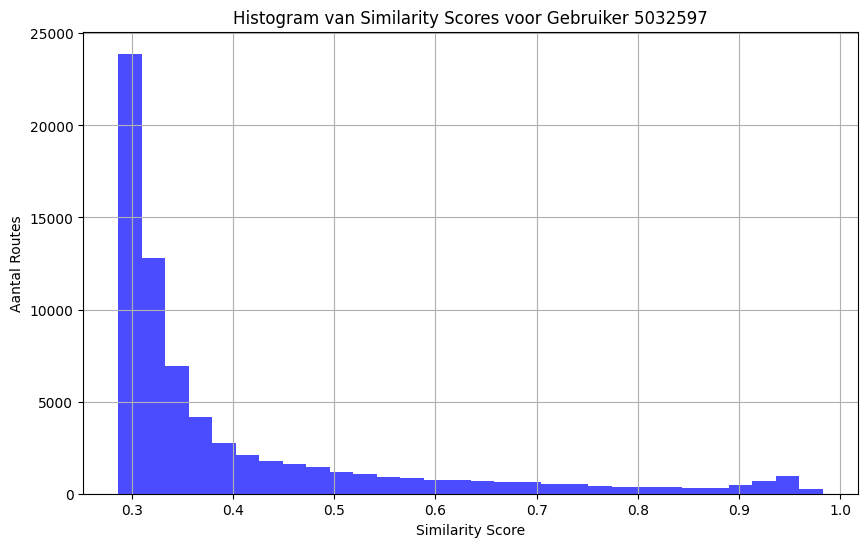

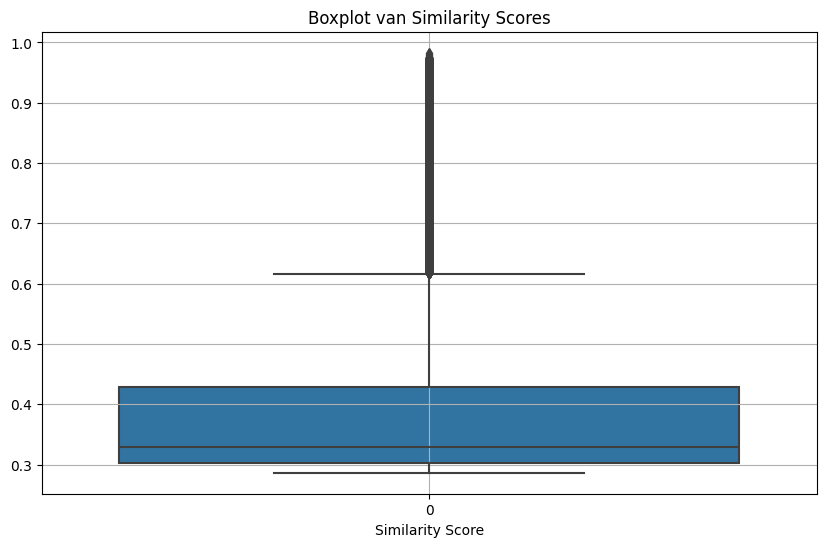

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,distance,altitude_change,userId,average_condition_value,speed,mean_altitude,mean_latitude,mean_longitude,distance_to_user,similarity_score
8562,"[56.1717599, 56.1717207, 56.1716561, 56.171658...","[10.2153755, 10.2155467, 10.2161896, 10.216581...","[37.6, 36.4, 36.0, 35.6, 35.2, 34.6, 33.2, 32....",run,356031357,"[93, 97, 104, 109, 113, 113, 115, 114, 117, 11...","[1402536259, 1402536263, 1402536276, 140253628...",21.102152,50.60001,2675116.0,3.439657,NaN,10.9704,56.174750,10.225502,17.333367,0.982952
8593,"[56.04716976173222, 56.04710471816361, 56.0469...","[9.943039426580071, 9.942689565941691, 9.94195...","[61.6, 61.6, 61.6, 61.6, 61.6, 61.6, 61.6, 61....",run,255209798,"[109, 112, 120, 125, 126, 129, 134, 139, 139, ...","[1376077534, 1376077537, 1376077543, 137607754...",21.649576,48.40000,2675116.0,3.439657,"[15.2244, 19.26, 26.9568, 29.4552, 29.394, 28....",46.9740,56.021950,9.930662,20.798277,0.980262
15192,"[56.16729559376836, 56.16737438365817, 56.1674...","[10.191205283626914, 10.19110050983727, 10.191...","[0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2...",run,259672965,"[120, 115, 111, 100, 91, 80, 74, 81, 89, 101, ...","[1382129928, 1382129933, 1382129940, 138212994...",24.356201,61.60000,126114.0,5.580678,NaN,-1.5316,56.191933,10.136193,11.523655,0.978839
8561,"[56.172075, 56.1720821, 56.1721098, 56.1720989...","[10.2148809, 10.2148661, 10.2147459, 10.214451...","[68.0, 68.0, 67.6, 68.8, 69.2, 69.4, 70.2, 70....",run,357562293,"[82, 84, 90, 95, 100, 106, 113, 118, 123, 127,...","[1402701205, 1402701206, 1402701209, 140270121...",13.149061,44.40000,2675116.0,3.439657,NaN,95.7552,56.184233,10.139505,11.891523,0.978345
21397,"[56.26059036701918, 56.26059313304722, 56.2606...","[9.935114923864603, 9.935112996026874, 9.93510...","[86.4, 86.4, 86.4, 86.4, 86.8, 87.0, 88.0, 88....",run,369785673,"[82, 82, 84, 86, 91, 96, 107, 112, 117, 122, 1...","[1404857881, 1404857882, 1404857883, 140485788...",9.891492,20.80000,8747440.0,0.968505,NaN,87.0424,56.257038,9.943619,5.453703,0.976290


In [2]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Loopdata/grotebestanden/run_gebruikersprofielen3.json'
routes_path = '../Data/Loopdata/grotebestanden/looproutes_aangepast.json'

# Stap 1: Laad de gebruikersprofielen en routes
with open(user_profiles_path, 'r') as file:
    user_profiles_content = (json.loads(line) for line in file)
    user_profiles_df = pd.DataFrame(user_profiles_content)

with open(routes_path, 'r') as file:
    routes_content = [json.loads(line) for line in file if line.strip()]

routes_df = pd.DataFrame(routes_content)

print("voor het verwijderen van de NaN-waarden")
print(user_profiles_df.isna().sum())
print(routes_df.isna().sum())

# Verwijder rijen met NaN-waarden in 'userId' en 'average_condition_value'
routes_df.dropna(subset=['userId', 'average_condition_value'], inplace=True)

print("na het verwijderen van de NaN-waarden")
print(user_profiles_df.isna().sum())
print(routes_df.isna().sum())
# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# scaler = MinMaxScaler()
# user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
# routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['average_distances']}<br>" \
                    f"Average Condition Value: {user_data['average_condition_value']}"

    # Voor satellietbeeld, vervang 'Stamen Terrain' met 'Stamen Toner' of 'Mapbox Satellite'
    # map_obj = folium.Map(location=user_location, zoom_start=12, tiles='Stamen Toner')
    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')

    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]  # Wijs een kleur toe aan elke route
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Average Altitude Change: {route_data['altitude_change']}<br>" \
                        f"Average Distance: {route_data['distance']}<br>" \
                        f"Average Condition Value: {route_data['average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj)  # Toon de kaart direct


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker



# sample_user_id = 7898832
sample_user_id = 5032597
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()
